# Упражнение 02 : Перекладина

In [11]:
import pandas as pd
import sqlite3
con = sqlite3.connect('../data/checking-logs.sqlite')

* анализируйте только пользователей, а не администраторов
* размер шрифта и размер рисунка остались прежними
* ночь — с 0:00:00 до 03:59:59, утро — с 04:00:00 до 09:59:59, день — с 10:00:00 до 16:59:59, вечер — с 17:00:00 до 23:59:59
* выберите палитру, которая вам действительно нравится, необязательно копировать её с графика выше

In [12]:
sql = '''
SELECT timestamp FROM checker
WHERE uid LIKE 'user_%'
'''
df_commit = pd.read_sql(sql, con, parse_dates=['timestamp'])

In [13]:
df_commit['date'] = df_commit['timestamp'].dt.date
df_commit['time'] = pd.cut(df_commit['timestamp'].dt.hour,
                         bins=[-1, 4, 10, 17, 24],
                         labels=['night', 'morning', 'afternoon', 'evening'])
df_commit.drop('timestamp', axis=1, inplace=True)
df_commit

,date,time
0,2020-04-17,morning
1,2020-04-17,morning
2,2020-04-17,morning
3,2020-04-17,morning
4,2020-04-17,morning
...,...,...
3202,2020-05-21,evening
3203,2020-05-21,evening
3204,2020-05-21,evening
3205,2020-05-21,evening


In [14]:
df_commit = df_commit.groupby(df_commit['time'], observed=False).value_counts().unstack(0)
df_commit

time,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,2,12,2
2020-04-25,1,21,48,34


<Axes: title={'center': 'Коммиты за день'}, xlabel='date'>

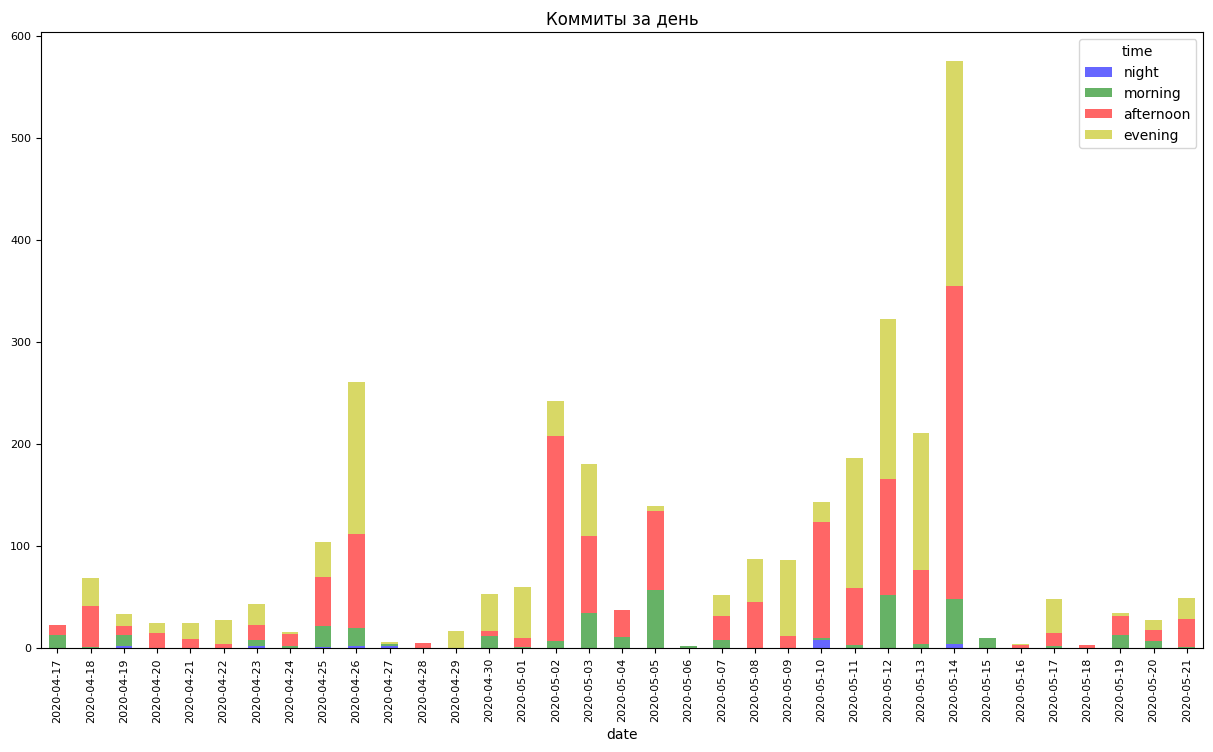

In [15]:
df_commit.plot(kind='bar',
                fontsize=8,
                figsize=(15, 8),
                title='Коммиты за день',
                rot=90,
                stacked=True,
                alpha=0.6,
                color=('b', 'g', 'r', 'y'))

## в конце блокнота Jupyter создайте ячейку с кодом и вставьте вопросы:
* «Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днём или вечером?» — это два наиболее распространённых периода.
* Который день имеет:
    * наибольшее количество коммитов
    * и в то же время количество коммитов вечером выше, чем днём?

In [16]:
df_commit.sum().sort_values(ascending=False)

time
afternoon    1473
evening      1369
morning       344
night          21
dtype: int64

In [17]:
df_commit = df_commit[df_commit['evening'] > df_commit['afternoon']].sum(axis=1).sort_values(ascending=False)
df_commit

date
2020-05-12    323
2020-04-26    261
2020-05-13    211
2020-05-11    186
2020-05-09     86
2020-05-01     60
2020-04-30     53
2020-05-17     48
2020-04-23     43
2020-04-19     33
2020-04-22     28
2020-04-21     25
2020-04-29     17
2020-04-27      6
dtype: int64

In [18]:
con.close()